<a href="https://colab.research.google.com/github/sabaagizew/PythonPackageStructure/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('drive/MyDrive/Week1_challenge_data_source(CSV).csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.shape

(150001, 55)

In [4]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Week1 challenge data source(CSV).csv dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Week1 challenge data source(CSV).csv dataset contains 12.5 % missing values.


In [7]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


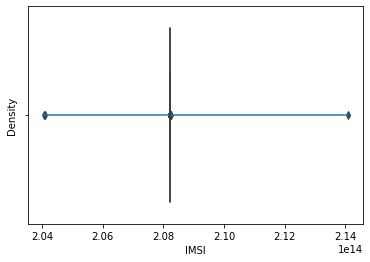

In [8]:
# Checking for skewness on one of the column specifically on the "IMSI"
import seaborn as sns
#
# Box plot
#
sns.boxplot(df.IMSI)
#
# Distribution plot
#
sns.distplot(df.IMSI)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


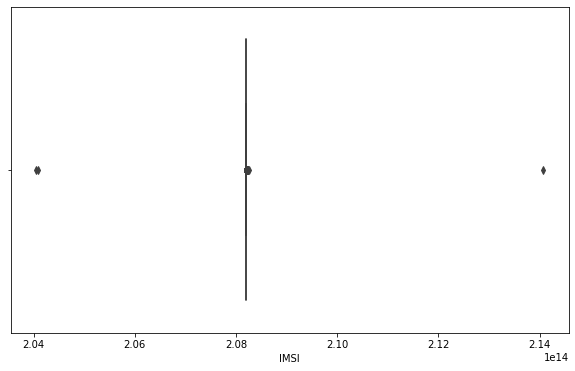

In [9]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.IMSI)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


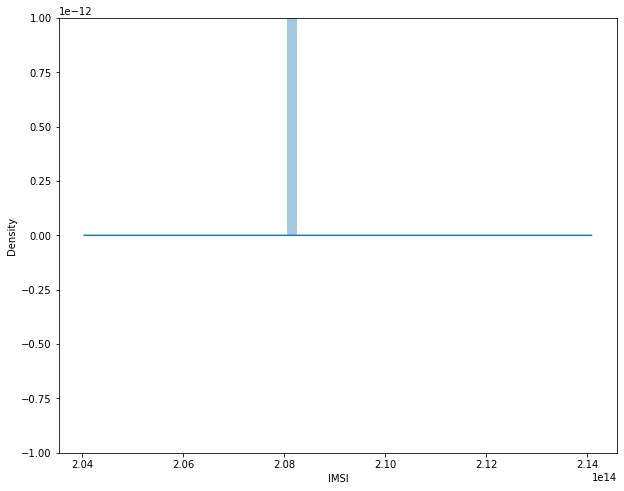

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df.IMSI)

In [11]:
df.IMSI.mode()

0    2.082014e+14
dtype: float64

In [12]:
# To see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True)

    print(missing_value_df)


every_column_percent_missing(df)

                                                                       column_name  percent_missing
Youtube DL (Bytes)                                              Youtube DL (Bytes)         0.000000
Other UL (Bytes)                                                  Other UL (Bytes)         0.000000
Other DL (Bytes)                                                  Other DL (Bytes)         0.000000
Gaming UL (Bytes)                                                Gaming UL (Bytes)         0.000000
Gaming DL (Bytes)                                                Gaming DL (Bytes)         0.000000
Netflix UL (Bytes)                                              Netflix UL (Bytes)         0.000000
Netflix DL (Bytes)                                              Netflix DL (Bytes)         0.000000
Youtube UL (Bytes)                                              Youtube UL (Bytes)         0.000000
Email UL (Bytes)                                                  Email UL (Bytes)         0.000000


In [13]:
# drop columns with more than 50% missing values
df_clean = df.drop(['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 37500B < Vol UL'], axis=1)

df_clean.shape

(150001, 45)

In [14]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [15]:
df_clean.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [16]:
# how many missing values exist on the new cleaned dataset on percentage ?

percent_missing(df_clean)

The Week1 challenge data source(CSV).csv dataset contains 1.02 % missing values.


In [17]:
every_column_percent_missing(df_clean)

                                                   column_name  percent_missing
Youtube DL (Bytes)                          Youtube DL (Bytes)         0.000000
Other UL (Bytes)                              Other UL (Bytes)         0.000000
Other DL (Bytes)                              Other DL (Bytes)         0.000000
Gaming UL (Bytes)                            Gaming UL (Bytes)         0.000000
Gaming DL (Bytes)                            Gaming DL (Bytes)         0.000000
Netflix UL (Bytes)                          Netflix UL (Bytes)         0.000000
Netflix DL (Bytes)                          Netflix DL (Bytes)         0.000000
Youtube UL (Bytes)                          Youtube UL (Bytes)         0.000000
Email UL (Bytes)                              Email UL (Bytes)         0.000000
Email DL (Bytes)                              Email DL (Bytes)         0.000000
Google UL (Bytes)                            Google UL (Bytes)         0.000000
Google DL (Bytes)                       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


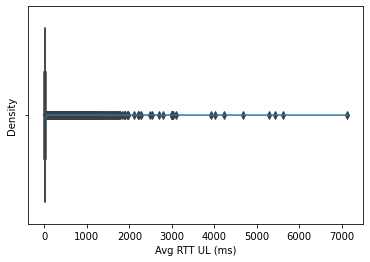

In [18]:
# Distribution plot to check for skewness

sns.boxplot(df['Avg RTT UL (ms)'])

sns.distplot(df['Avg RTT UL (ms)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


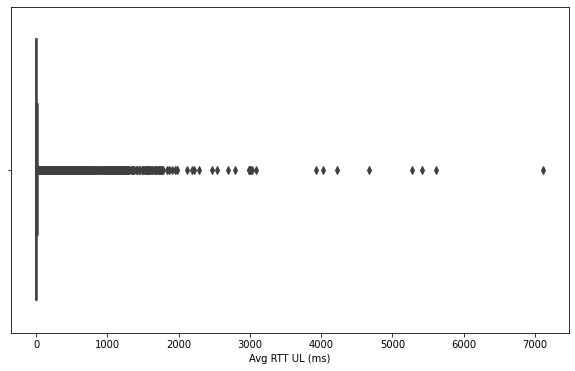

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df['Avg RTT UL (ms)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


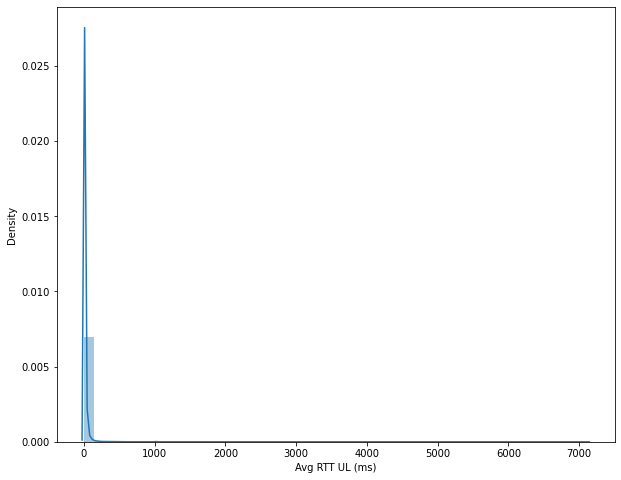

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df['Avg RTT UL (ms)'])

In [21]:
#df_clean['# fill missing with ffill method for columns ()

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')

# fill 'Handset Type, Handset Manufacturer, IMEI & MSISDN/Number' column with mode 
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].mode()[0])
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].mode()[0])

In [22]:
percent_missing(df_clean)
every_column_percent_missing(df_clean)

The Week1 challenge data source(CSV).csv dataset contains 0.82 % missing values.
                                                   column_name  percent_missing
Bearer Id                                            Bearer Id         0.000000
Dur. (ms).1                                        Dur. (ms).1         0.000000
Handset Manufacturer                      Handset Manufacturer         0.000000
Handset Type                                      Handset Type         0.000000
Nb of sec with Vol DL < 6250B    Nb of sec with Vol DL < 6250B         0.000000
Nb of sec with Vol UL < 1250B    Nb of sec with Vol UL < 1250B         0.000000
Social Media DL (Bytes)                Social Media DL (Bytes)         0.000000
Social Media UL (Bytes)                Social Media UL (Bytes)         0.000000
Google DL (Bytes)                            Google DL (Bytes)         0.000000
Google UL (Bytes)                            Google UL (Bytes)         0.000000
Email DL (Bytes)                       

In [23]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
591,156.536144
352,32.108297
536,322.238575
205,80.728353
832,269.994229


In [24]:
original_data[0].min(), original_data[0].max()

(0.08309253622952206, 1974.7838550418646)

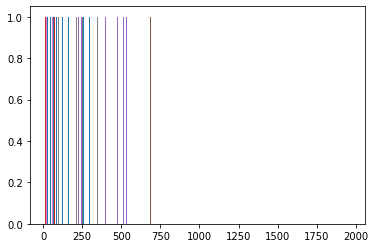

In [25]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

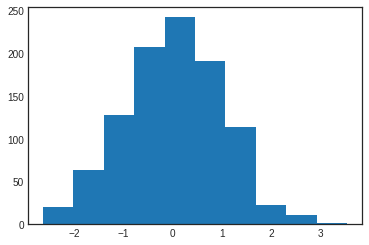

In [27]:
plt.hist(data);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


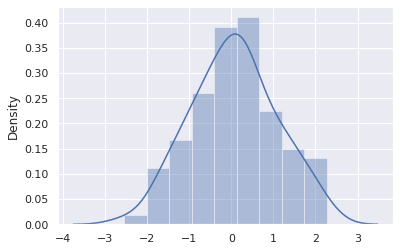

In [28]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


sns.set(); np.random.seed(0)
x = np.random.randn(100)

sns.distplot(x)

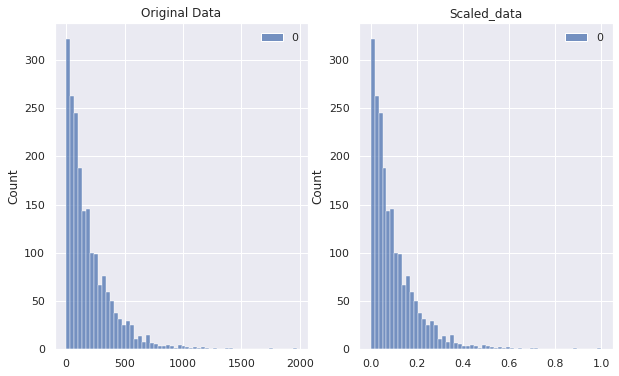

In [29]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled_data")
    
scaler(original_data)

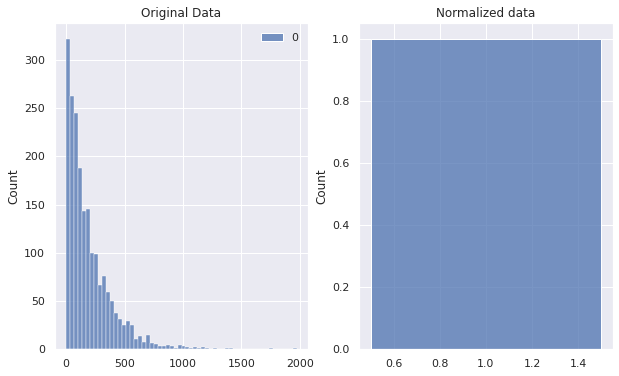

In [30]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [37]:
df_clean["Handset Type"].value_counts().head(10)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [38]:
df_clean["Handset Manufacturer"].value_counts().head(3)

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [39]:
apple_handsets = df_clean[df_clean["Handset Manufacturer"] == "Apple"]
apple_handsets["Handset Type"].value_counts().head(5)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [40]:
Samsung_handsets = df_clean[df_clean["Handset Manufacturer"] == "Samsung"]
Samsung_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [41]:
huawei_handsets = df_clean[df_clean["Handset Manufacturer"] == "Huawei"]
huawei_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [42]:
data_usage = df_clean[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')



,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
"33,601,001,722.00","116,720,140.00","842,637,466.00","36,053,108.00"
"33,601,001,754.00","181,230,963.00","120,755,184.00","36,104,459.00"
"33,601,002,511.00","134,969,374.00","556,659,663.00","39,306,820.00"
"33,601,007,832.00","49,878,024.00","401,993,172.00","20,327,526.00"
"33,601,008,617.00","37,104,453.00","1,363,130,417.00","94,280,527.00"
...,...,...,...
"33,789,996,170.00","8,810,688.00","687,925,212.00","26,716,429.00"
"33,789,997,247.00","140,988,659.00","444,575,092.00","35,732,243.00"
"3,197,020,876,596.00","877,385,325.00","194,828,056.00","37,295,915.00"


In [43]:
# task 1.1 A
df_clean.groupby('MSISDN/Number').agg({'Bearer Id': 'count'}).head(10)

,Bearer Id
MSISDN/Number,
"33,601,001,722.00",1
"33,601,001,754.00",1
"33,601,002,511.00",1
"33,601,007,832.00",1
"33,601,008,617.00",2
"33,601,010,682.00",2
"33,601,011,634.00",2
"33,601,011,959.00",1
"33,601,014,694.00",2


In [44]:
#the total data volume (in Bytes) during this session for each application
df_clean['Youtube_total_data_volume'] = df_clean['Youtube DL (Bytes)'] + df_clean['Youtube UL (Bytes)']
df_clean['Google_total_data_volume'] = df_clean['Google DL (Bytes)'] + df_clean['Google UL (Bytes)']
df_clean['Email_total_data_volume'] = df_clean['Email DL (Bytes)'] + df_clean['Email UL (Bytes)']

df_clean['Netflix_total_data_volume'] = df_clean['Netflix DL (Bytes)'] + df_clean['Netflix UL (Bytes)']
df_clean['Gaming_total_data_volume'] = df_clean['Gaming DL (Bytes)'] + df_clean['Gaming UL (Bytes)']
df_clean['Other_total_data_volume'] = df_clean['Other DL (Bytes)'] + df_clean['Other UL (Bytes)']
df_clean['SocialMedia_total_data_volume'] = df_clean['Social Media DL (Bytes)'] + df_clean['Social Media UL (Bytes)']

df_clean['All_total_data_volume'] = df_clean['Total DL (Bytes)'] + df_clean['Total UL (Bytes)']

In [45]:
#the total data volume (in Bytes) during this session for each application
df_clean.groupby('MSISDN/Number').agg({'Youtube_total_data_volume': 'sum','Google_total_data_volume': 'sum','Email_total_data_volume': 'sum','Netflix_total_data_volume': 'sum','Gaming_total_data_volume': 'sum','Other_total_data_volume': 'sum','SocialMedia_total_data_volume': 'sum','All_total_data_volume':'sum' }).head(10)

,Youtube_total_data_volume,Google_total_data_volume,Email_total_data_volume,Netflix_total_data_volume,Gaming_total_data_volume,Other_total_data_volume,SocialMedia_total_data_volume,All_total_data_volume
MSISDN/Number,,,,,,,,
"33,601,001,722.00","21,624,548.00","4,389,005.00","1,331,362.00","27,180,981.00","812,458,661.00","386,570,872.00","2,232,135.00","878,690,574.00"
"33,601,001,754.00","12,432,223.00","5,334,863.00","3,307,781.00","11,221,763.00","119,750,078.00","281,710,071.00","2,660,565.00","156,859,643.00"
"33,601,002,511.00","21,333,570.00","3,443,126.00","3,205,380.00","19,353,900.00","538,827,713.00","501,693,672.00","3,195,623.00","595,966,483.00"
"33,601,007,832.00","6,977,321.00","9,678,493.00","2,284,670.00","1,942,092.00","391,126,127.00","35,279,702.00","280,294.00","422,320,698.00"
"33,601,008,617.00","41,533,002.00","18,499,616.00","3,305,469.00","49,201,724.00","1,314,797,820.00","804,804,484.00","2,912,542.00","1,457,410,944.00"
"33,601,010,682.00","34,347,122.00","15,263,134.00","7,848,596.00","30,315,501.00","511,635,787.00","492,372,777.00","3,792,912.00","615,217,221.00"
"33,601,011,634.00","26,431,335.00","10,196,403.00","1,358,959.00","45,812,397.00","548,461,057.00","224,888,713.00","2,769,627.00","654,723,066.00"
"33,601,011,959.00","18,892,740.00","12,023,614.00","2,215,563.00","15,292,840.00","282,364,397.00","178,201,537.00","1,782,692.00","332,660,357.00"
"33,601,014,694.00","63,443,802.00","14,134,211.00","4,599,825.00","54,216,117.00","833,087,952.00","1,041,882,992.00","5,288,685.00","990,132,189.00"


In [46]:
df_clean[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "SocialMedia_total_data_volume", "Google_total_data_volume", "Email_total_data_volume", "Youtube_total_data_volume", "Netflix_total_data_volume", "Gaming_total_data_volume", "Total DL (Bytes)", "Total UL (Bytes)"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),SocialMedia_total_data_volume,Google_total_data_volume,Email_total_data_volume,Youtube_total_data_volume,Netflix_total_data_volume,Gaming_total_data_volume,Total DL (Bytes),Total UL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"104,609,060.89","454,642,878.43","41,121,129.66","1,828,250.21","7,807,294.55","2,259,102.31","22,643,482.64","22,628,606.54","430,333,100.71","454,642,878.43","41,121,129.66"
std,"81,037,343.30","244,142,154.05","11,276,387.99","1,035,646.14","3,516,420.24","1,071,109.06","9,246,800.31","9,260,820.09","244,019,924.02","244,142,154.05","11,276,387.99"
min,"7,142,988.00","7,114,041.00","2,866,892.00","1,563.00","40,330.00","8,359.00","78,903.00","98,432.00","306,358.00","7,114,041.00","2,866,892.00"
25%,"57,442,058.00","243,107,173.00","33,221,955.00","932,218.00","4,943,599.00","1,359,344.00","15,998,463.00","15,979,455.00","218,727,939.00","243,107,173.00","33,221,955.00"
50%,"86,399,983.00","455,840,911.00","41,143,242.00","1,826,471.00","7,812,835.00","2,263,567.00","22,661,770.00","22,635,545.00","431,614,977.00","455,840,911.00","41,143,242.00"
75%,"132,430,686.00","665,705,138.00","49,034,238.00","2,727,487.00","10,682,796.00","3,159,818.00","29,292,604.00","29,290,445.00","641,415,878.00","665,705,138.00","49,034,238.00"
max,"1,859,336,442.00","902,969,616.00","78,331,311.00","3,650,861.00","15,528,782.00","4,518,036.00","45,190,078.00","45,198,153.00","859,202,784.00","902,969,616.00","78,331,311.00"


Text(0.5, 1.0, 'Duration Histogram')

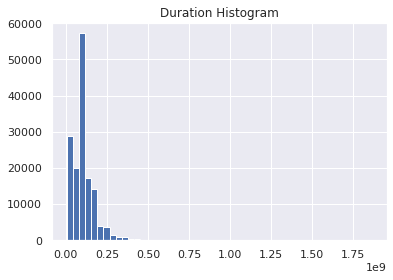

In [47]:
df_clean["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")

Text(0.5, 1.0, 'Total Download Histogram')

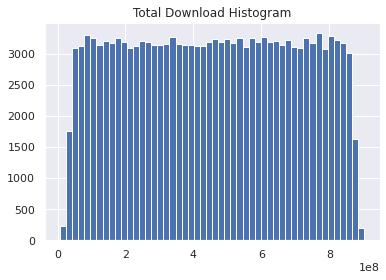

In [48]:
df_clean["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

Text(0.5, 1.0, 'Total Upload Histogram')

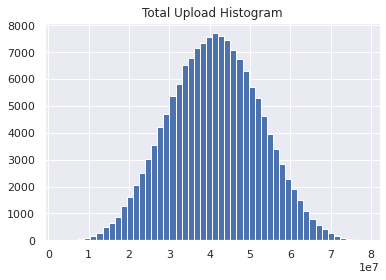

In [49]:
df_clean["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")

Text(0.5, 1.0, 'Total Social Media Data Histogram')

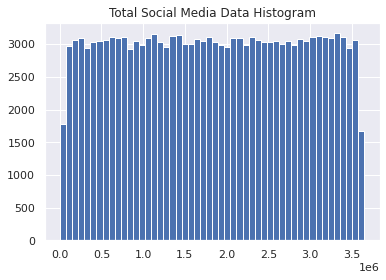

In [50]:
df_clean["SocialMedia_total_data_volume"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")

Text(0.5, 1.0, 'Total Google Data Histogram')

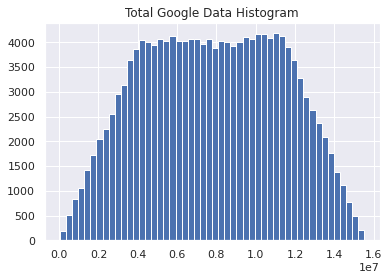

In [51]:
df_clean["Google_total_data_volume"].hist(bins = 50)
plt.title("Total Google Data Histogram")

Text(0.5, 1.0, 'Total Email Data Histogram')

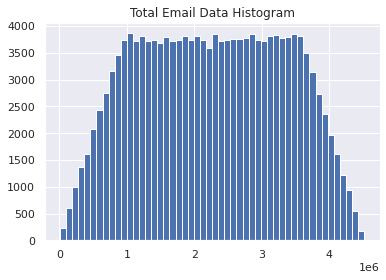

In [52]:
df_clean["Email_total_data_volume"].hist(bins = 50)
plt.title("Total Email Data Histogram")

Text(0.5, 1.0, 'Total Youtube Data Histogram')

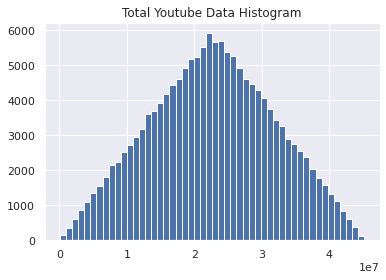

In [53]:
df_clean["Youtube_total_data_volume"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")

Text(0.5, 1.0, 'Total Netflix Data Histogram')

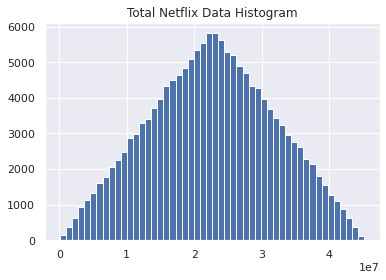

In [54]:
df_clean["Netflix_total_data_volume"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")

Text(0.5, 1.0, 'Total Gaming Data Histogram')

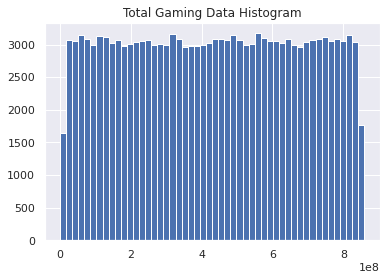

In [55]:
df_clean["Gaming_total_data_volume"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")

Text(0.5, 1.0, 'App Data usage')

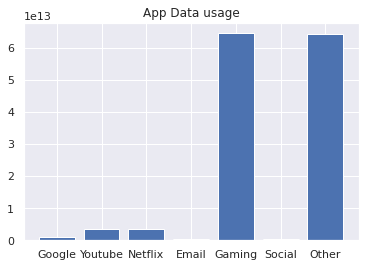

In [56]:
total_usage = df_clean[["Google_total_data_volume", "Youtube_total_data_volume", "Netflix_total_data_volume", "Email_total_data_volume", "Gaming_total_data_volume", "SocialMedia_total_data_volume", "Other_total_data_volume"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")

In [32]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

In [33]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

In [34]:
pd.set_option('max_column', None)
df=pd.read_csv('drive/MyDrive/Week1_challenge_data_source(CSV).csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,nan,nan,nan,nan,nan,nan,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),nan,nan,nan,nan,nan,nan,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),nan,nan,nan,nan,nan,nan,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,nan,nan,44.00,44.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,nan,nan,nan,nan,nan,nan,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,nan,nan,6.00,9.00,nan,nan,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,nan,nan,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,nan,nan,nan,nan,nan,nan,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","